In [6]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.feature_extraction.text import CountVectorizer

# Retrieve Data from txt file 

In [8]:
data = open("/home/sangram/AdvancedPython/cluster.txt").read().split('\n')

# Vectorize sentences from data to 2D matrix

Use `CountVectorizer()` function from `scikit-learn` package

In [10]:
count_vect = CountVectorizer() #Scikit-learn function to vectorize using Counts of words
count_matrix = count_vect.fit_transform(data)

# Pre Processing data 

In [14]:
# convert to Numpy array
numpy_matrix = count_matrix.toarray()
# Remove the row containing all zero 
numpy_matrix1 = numpy_matrix[~np.all(numpy_matrix == 0, axis = 1)]

# Apply Agglomerative clustering 

Using `single` linkage and `cosine` similarity metric

In [15]:
Z = linkage(numpy_matrix1,method='single',metric='cosine')

# Plot Dendograms from clusters

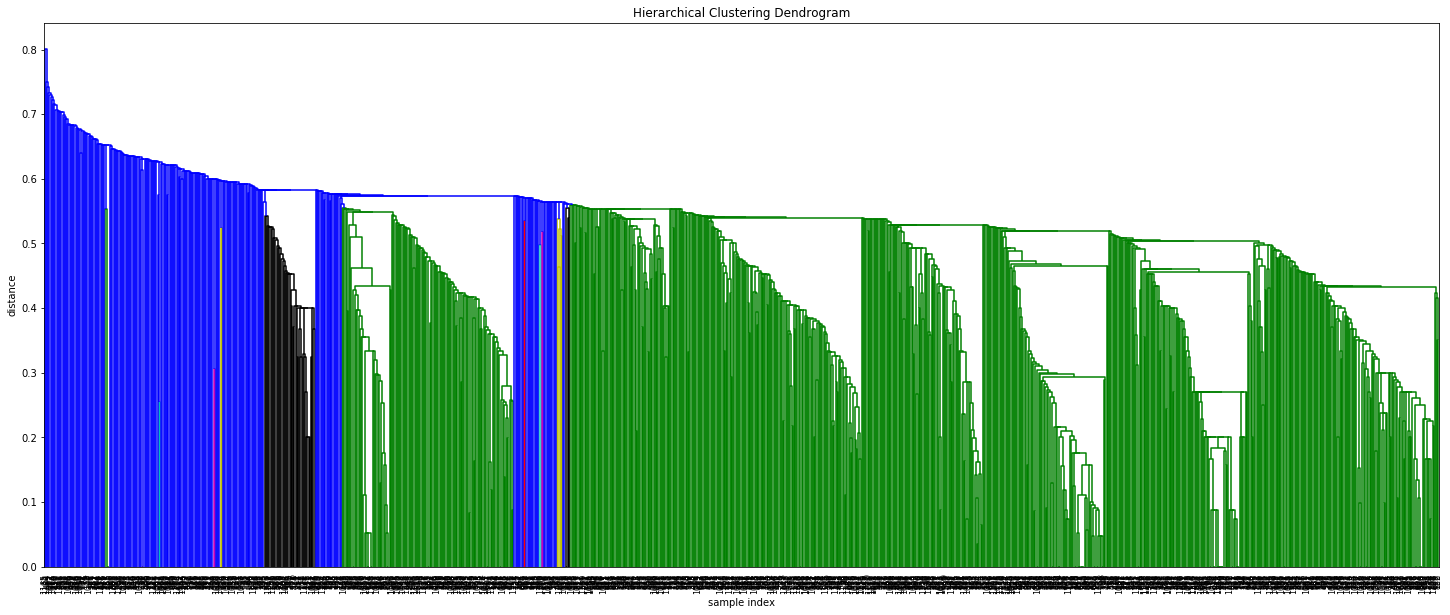

In [16]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

# Truncate Dendograms to find optimal number of clusters


In [31]:
def plot_truncated_dendograms(n_clusters):
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram (truncated)')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        Z,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=n_clusters,  # show only the last p merged clusters
        show_leaf_counts=False,  # otherwise numbers in brackets are counts
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,  # to get a distribution impression in truncated branches
    )
    plt.show()

In [32]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interactive_plot = interactive( plot_truncated_dendograms, n_clusters=(20,60,1))
# output = interactive_plot.children[-1]
# output.layout.height = '350px'
interactive_plot


interactive(children=(IntSlider(value=40, description='n_clusters', max=60, min=20), Output()), _dom_classes=('widget-interact',))


# Retrieve the Clusters

Now, let's finally have a look at how to retrieve the clusters, for different ways of determining k. We can use the fcluster function.

# Knowing max_d:

Let's say we determined the max distance with help of a dendrogram, then we can do the following to get the cluster id for each of our samples:


In [30]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.68 
clusters = fcluster(Z, max_d, criterion='distance')
np.unique(clusters)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27], dtype=int32)